# Principal Component Analysis

## import library

In [3238]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [3239]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

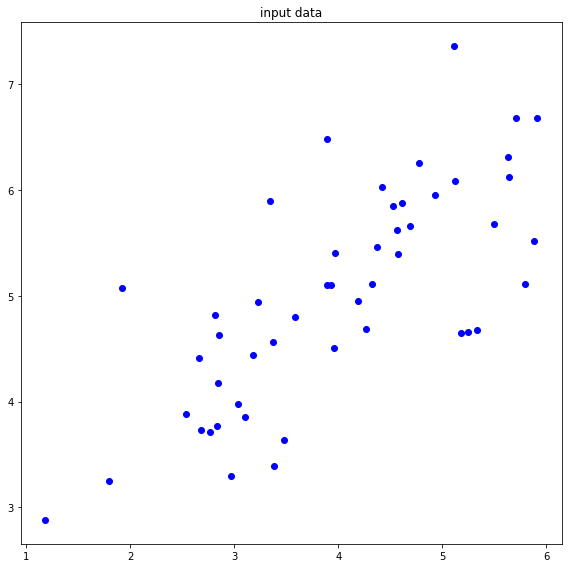

In [3240]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [3241]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature_normalize = feature - np.mean(feature , axis = 0)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [3242]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [3243]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    std=np.std(feature0, axis = 0)
    feature=feature/std
    Sigma=(np.matmul(feature.T,feature))/(number_data-1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [3244]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    cov_mat=compute_covariance(feature)
    global eig_vals,eig_vecs

    eig_vals,eig_vecs=np.linalg.eig(cov_mat)
    eig_vals, eig_vecs = zip(*sorted(zip(list(eig_vals), list(eig_vecs.T)),key=lambda x: x[0], reverse=True))
    eig_vecs=np.array(eig_vecs).T


    principal_component_1=[]
    principal_component_1.append(eig_vals[0])
    principal_component_1.append(eig_vecs[0])
    principal_component_1=np.array(principal_component_1)    
    
    principal_component_2=[]
    principal_component_2.append(eig_vals[1])
    principal_component_2.append(eig_vecs[1])
    principal_component_2=np.array(principal_component_2)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

In [3245]:
def VectorToLinear(vector):
    a = vector[1]/vector[0]
    test_x = np.arange(-2.8, 2.8, 0.1)
    test_y = a * test_x
    return test_x, test_y

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [3246]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    pca = np.dot(feature, vector)
    trans_e_vector = vector[:,None].T
    projection = np.dot(pca[:,None], trans_e_vector)    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [3247]:
(principal_component_1, principal_component_2) = compute_principal_component(feature)
projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [3248]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')
    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)
    plt.tight_layout()
    plt.show()

In [3249]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, c='b')
    plt.quiver([0], [0], eig_vecs[0, 0], eig_vecs[1, 0], color=['r'],angles='xy', scale_units='xy', scale=0.6)
    plt.quiver([0], [0], eig_vecs[0, 1], eig_vecs[1, 1], color=['g'],angles='xy', scale_units='xy')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [3250]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    plt.scatter(x, y, c='b', )
    first_x , first_y = VectorToLinear(eig_vecs[:,0].T)
    plt.plot(first_x, first_y, c='r')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [3251]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, c='b')
    second_x , second_y = VectorToLinear(eig_vecs[:,1].T)
    plt.plot(second_x , second_y, c='r')    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)
    plt.tight_layout()
    plt.show()

In [3252]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, c='b',s=30)
    first_x , first_y = VectorToLinear(eig_vecs[:,0].T)
    first_pca = compute_projection_onto_line(feature, eig_vecs[:,0])
    plt.plot(first_x, first_y, c='r')
    plt.scatter(first_pca[:,0], first_pca[:,1], c = 'g', s=30)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [3253]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    plt.scatter(x, y, c='b',s=30)
    second_x , second_y = VectorToLinear(eig_vecs[:,1].T)
    second_pca = compute_projection_onto_line(feature, eig_vecs[:,1])
    plt.plot(second_x, second_y, c='r')
    plt.scatter(second_pca[:,0], second_pca[:,1], c = 'g', s=30)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [3254]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    plt.scatter(x, y, c='b',s=30)
    first_x , first_y = VectorToLinear(eig_vecs[:,0].T)
    first_pca = compute_projection_onto_line(feature, eig_vecs[:,0])
    plt.plot(first_x, first_y, c='r')
    plt.scatter(first_pca[:,0], first_pca[:,1], c = 'g', s=40)
    for i in range (50):
        dist = np.array([[x[i], y[i]],[first_pca[i,0], first_pca[i,1]]])
        plt.plot(dist[:,0], dist[:,1], c = 'grey')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [3255]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    plt.scatter(x, y, c='b',s=30)
    second_x , second_y = VectorToLinear(eig_vecs[:,1].T)
    second_pca = compute_projection_onto_line(feature, eig_vecs[:,1])
    plt.plot(second_x, second_y, c='r')
    plt.scatter(second_pca[:,0], second_pca[:,1], c = 'g', s=40)
    for i in range (50):
        dist = np.array([[x[i], y[i]],[second_pca[i,0], second_pca[i,1]]])
        plt.plot(dist[:,0], dist[:,1], c = 'grey')
    # # ++++++++++++++++++++++++++++++++++++++++++++++++++
    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


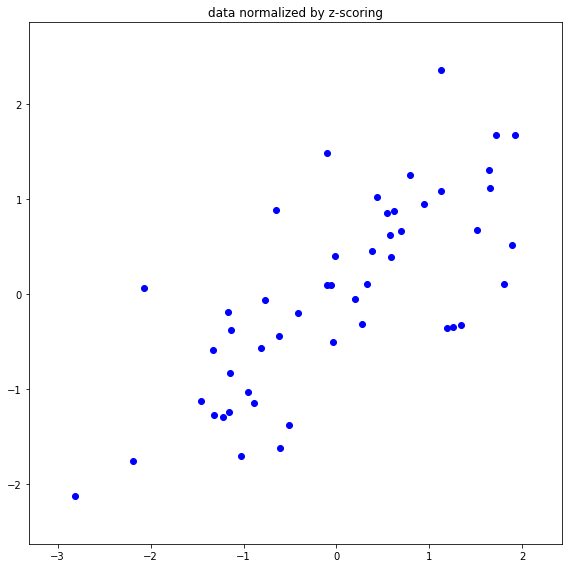

**************************************************
## [RESULT 02]
**************************************************


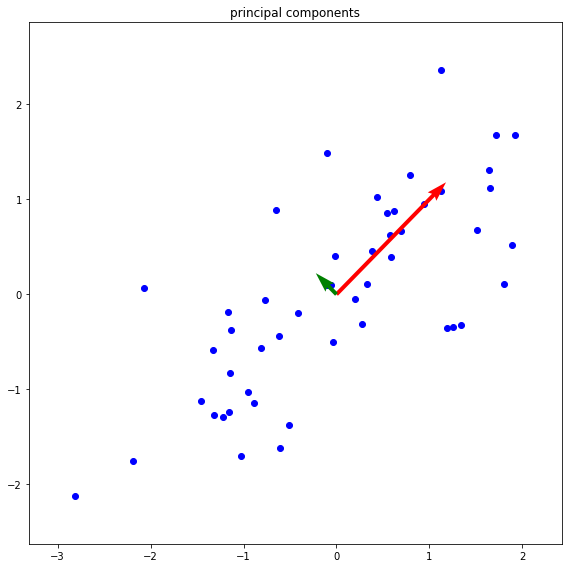

**************************************************
## [RESULT 03]
**************************************************


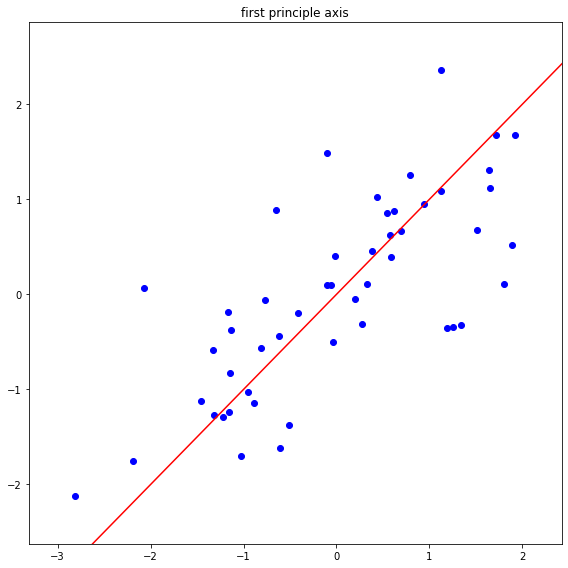

**************************************************
## [RESULT 04]
**************************************************


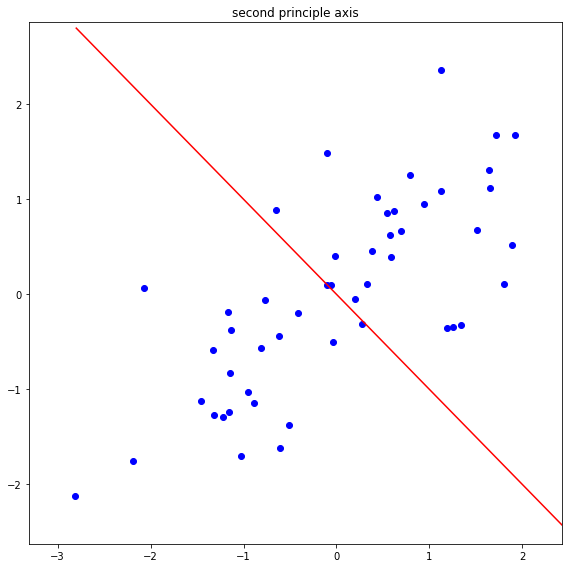

**************************************************
## [RESULT 05]
**************************************************


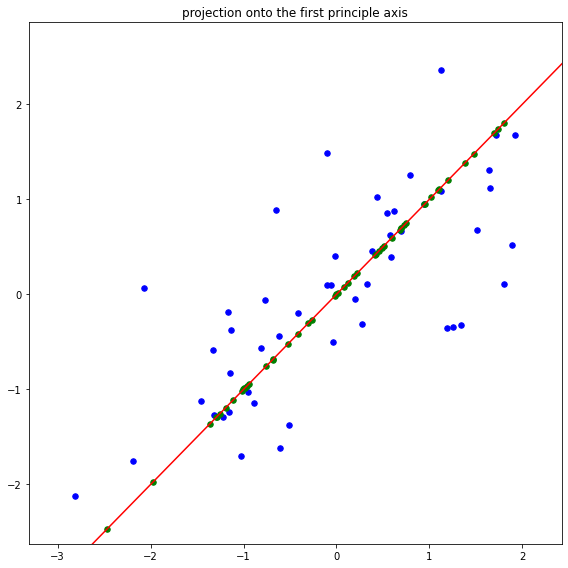

**************************************************
## [RESULT 06]
**************************************************


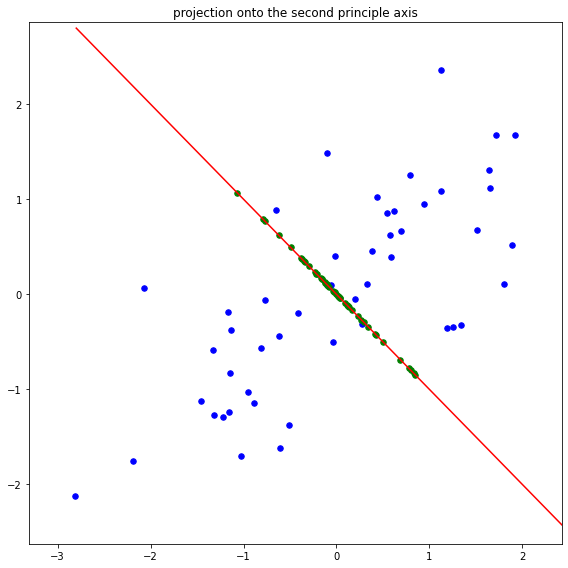

**************************************************
## [RESULT 07]
**************************************************


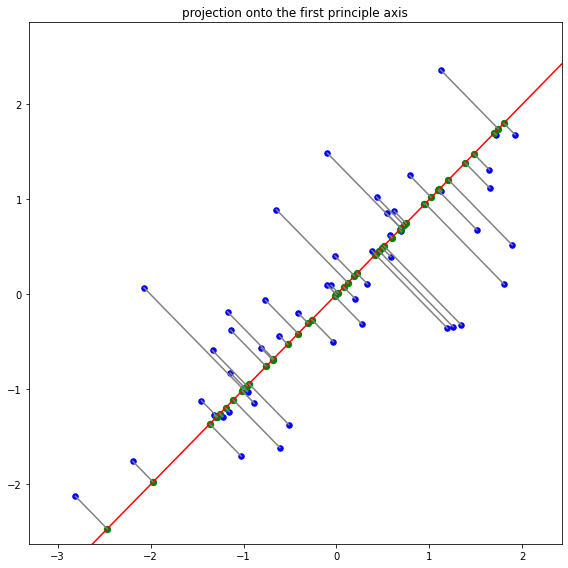

**************************************************
## [RESULT 08]
**************************************************


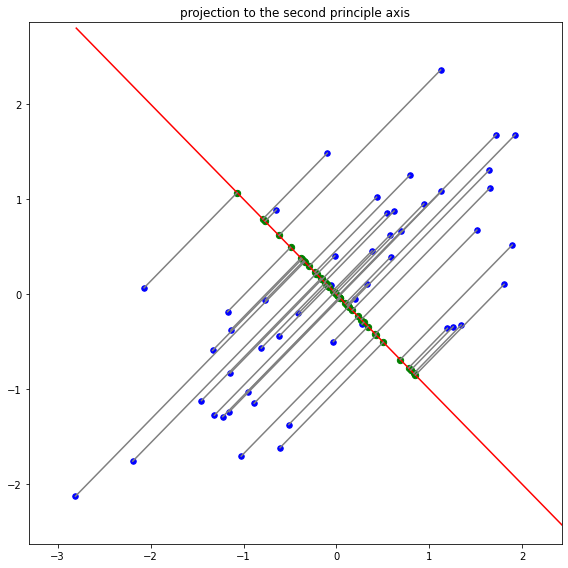

In [3256]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)